## TOLNet API

#### A Brief Tutorial on Understanding, Downloading, and Plotting, TOLNet Data

#### Website: https://tolnet.larc.nasa.gov/
##### Author: M. Roots

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.units as munits
import datetime
import numpy as np

class filter_files:
    def __init__(self, df):
        self.df = df
        pass

    def daterange(self, min_date: str = None, max_date: str = None, **kwargs) -> pd.DataFrame:
        try:
            self.df = self.df[(self.df["start_data_date"] >= min_date) & (self.df["start_data_date"] <= max_date)]
        except:
            pass
        return self

    def instrument_group(self, instrument_group: list = None, **kwargs) -> pd.DataFrame:
        try:
            self.df = self.df[self.df["instrument_group_id"].isin(instrument_group)]
        except:
            pass
        return self

    def product_type(self, product_type: list = None, **kwargs) -> pd.DataFrame:
        try:
            self.df = self.df[self.df["product_type_id"].isin(product_type)]
        except:
            pass
        return self

    def file_type(self, file_type: list = None, **kwargs) -> pd.DataFrame:
        try:
            self.df = self.df[self.df["file_type_id"].isin(file_type)]
        except:
            pass
        return self
        
class TOLNet:
    
    def __init__(self):
        self.products = self.get_product_types()
        self.file_types = self.get_file_types()
        self.instrument_groups = self.get_instrument_groups()
        self.files = self.get_files_list()
        return
    
    @staticmethod
    def get_product_types():
        return pd.DataFrame(requests.get("https://tolnet.larc.nasa.gov/api/data/product_types").json())
    
    @staticmethod
    def get_file_types():
        return pd.DataFrame(requests.get("https://tolnet.larc.nasa.gov/api/data/file_types").json())
    
    @staticmethod
    def get_instrument_groups():
        return pd.DataFrame(requests.get("https://tolnet.larc.nasa.gov/api/instruments/groups").json())

    @staticmethod
    def get_files_list():
        dtypes = {"row": "int16", 
                 "count": "int16", 
                 "id": "int16",
                 "file_name": "str",
                 "file_server_location": "str",
                 "author": "str",
                 "instrument_group_id": "int16",
                 "product_type_id": "int16",
                 "file_type_id":"int16",
                 "start_data_date": "datetime64[ns]",
                 "end_data_date":"datetime64[ns]",
                 "upload_date":"datetime64[ns]",
                 "public": "bool",
                 "instrument_group_name": "str",
                 "folder_name": "str",
                 "current_pi": "str",
                 "product_type_name": "str",
                 "file_type_name": "str",
                 "revision": "int16",
                 "near_real_time": "str",
                 "file_size": "int16",
                 "isAccessible": "bool"
                 }

        i = 1
        url = f"https://tolnet.larc.nasa.gov/api/data/1?order=data_date&order_direction=desc"
        response = requests.get(url).status_code
        data_frames = []
        while response == 200:
            data_frames.append(pd.DataFrame(requests.get(url).json()))
            i += 1
            url = f"https://tolnet.larc.nasa.gov/api/data/{i}?order=data_date&order_direction=desc"
            response = requests.get(url).status_code

        df = pd.concat(data_frames, ignore_index=True)
        df["start_data_date"] = pd.to_datetime(df["start_data_date"])
        df["end_data_date"] = pd.to_datetime(df["end_data_date"])
        df["upload_date"] = pd.to_datetime(df["upload_date"])
        return df.astype(dtypes)
    
    @staticmethod
    def import_json(file_id: int) -> pd.DataFrame:
        url = f"https://tolnet.larc.nasa.gov/api/data/json/{file_id}"
        response = requests.get(url).json()

        data = np.array(response["value"]["data"], dtype=float)
        time = np.array(response["datetime"]["data"])
        alt = np.array(response["altitude"]["data"], dtype=float)

        dataset = pd.DataFrame(data=data, index=time, columns=alt)
        dataset.index = pd.to_datetime(dataset.index)
        return dataset
    
    def import_data_json(self, **kwargs):
        file_info = filter_files(self.files).daterange(**kwargs).instrument_group(**kwargs).product_type(**kwargs).file_type(**kwargs).df
        if file_info.size == self.files.size:
            prompt = input("You are about to download ALL TOLNet JSON files available... Would you like to proceed? (yes | no)")
            if prompt.lower() == "no":
                return
        self.data = {}
        for file_name, file_id in zip(file_info["file_name"], file_info["id"]):
            self.data[file_name] = self.import_json(file_id)
        return self
    
    @staticmethod
    def O3_curtain_colors():

        ncolors = [np.array([255,  140,  255]) / 255.,
           np.array([221,  111,  242]) / 255.,
           np.array([187,  82,  229]) / 255.,
           np.array([153,  53,  216]) / 255.,
           np.array([119,  24,  203]) / 255.,
           np.array([0,  0,  187]) / 255.,
           np.array([0,  44,  204]) / 255.,
           np.array([0,  88,  221]) / 255.,
           np.array([0,  132,  238]) / 255.,
           np.array([0,  165,  255]) / 255.,
           np.array([0,  235,  255]) / 255.,
           np.array([39,  255,  215]) / 255.,
           np.array([99,  255,  150]) / 255.,
           np.array([163,  255,  91]) / 255.,
           np.array([211,  255,  43]) / 255.,
           np.array([255,  255,  0]) / 255.,
           np.array([250,  200,  0]) / 255.,
           np.array([255,  159,  0]) / 255.,
           np.array([255,  111,  0]) / 255.,
           np.array([255,  63,  0]) / 255.,
           np.array([255,  0,  0]) / 255.,
           np.array([216,  0,  15]) / 255.,
           np.array([178,  0,  31]) / 255.,
           np.array([140,  0,  47]) / 255.,
           np.array([102,  0,  63]) / 255.,
           np.array([200,  200,  200]) / 255.,
           np.array([140,  140,  140]) / 255.,
           np.array([80,  80,  80]) / 255.,
           np.array([52,  52,  52]) / 255.,
           np.array([0,0,0]) ]

        ncmap = mpl.colors.ListedColormap(ncolors)
        ncmap.set_under([1,1,1])
        ncmap.set_over([0,0,0])
        bounds =   [0.001, *np.arange(5, 110, 5), 120, 150, 200, 300, 600]
        nnorm = mpl.colors.BoundaryNorm(bounds, ncmap.N)
        return ncmap, nnorm

    def tolnet_curtains(self, smooth=True, **kwargs):

        fig = plt.figure(figsize=(15, 8))
        ax = plt.subplot(111)
        ncmap, nnorm = self.O3_curtain_colors()

        for name in self.data.keys():
            X, Y, Z = (self.data[name].index, self.data[name].columns, self.data[name].to_numpy().T,)
            im = ax.pcolormesh(X, Y, Z, cmap=ncmap, norm=nnorm, shading="nearest")

        cbar = fig.colorbar(im, ax=ax, pad=0.01, ticks=[0.001, *np.arange(10, 100, 10), 300])
        cbar.set_label(label='Ozone ($ppb_v$)', size=16, weight="bold")

        if "title" in kwargs.keys():
            plt.title(kwargs["title"], fontsize=18)
        else: plt.title(r"$O_3$ Mixing Ratio Profile ($ppb_v$)", fontsize=20)

        if "ylabel" in kwargs.keys():
            ax.set_ylabel(kwargs["ylabel"], fontsize=18)
        else: ax.set_ylabel("Altitude (km AGL)", fontsize=18)

        if "xlabel" in kwargs.keys():
            ax.set_xlabel(kwargs["xlabel"], fontsize=20)
        else: ax.set_xlabel("Datetime (UTC)", fontsize=18)

        if "xlims" in kwargs.keys():
            ax.set_xlim(kwargs["xlims"])
        else: ax.set_xlim([np.datetime64(lim[0]), np.datetime64(lim[-1])])

        if "ylims" in kwargs.keys():
            ax.set_ylim(kwargs["ylims"])
        else:

        if "yticks" in kwargs.keys():
            ax.set_yticks(kwargs["yticks"], fontsize=20)

        if "surface" in kwargs.keys():
            df = kwargs["surface"][0]
            dummy = np.ones(len(df))*kwargs["surface"][1]
            ax.scatter(df.index, dummy, c=df, cmap=ncmap, norm=nnorm)

        converter = mdates.ConciseDateConverter()
        munits.registry[datetime.datetime] = converter

        ax.xaxis_date()

        # fonts
        plt.setp(ax.get_xticklabels(), fontsize=16)
        plt.setp(ax.get_yticklabels(), fontsize=16)
        cbar.ax.tick_params(labelsize=16)

        plt.tight_layout()

        if "savefig" in kwargs.keys():
            plt.savefig(f"{kwargs['savefig']}", dpi=600)

        plt.show()

        return

In [2]:
tolnet = TOLNet()

In [3]:
tolnet.products

,id,product_type_name,description,parent_id,display_order,show_on_graph_page
0,1,O3Lidar,Vertical profiles of ozone using a lidar techn...,NaN,1,t
1,2,Surface,In-situ measurements of surface products,NaN,2,f
2,3,Other,Data that is not ozone lidar or surface in-sit...,NaN,3,f
3,4,HIRES,Highest temporal and vertical resolution data,1.0,1,t
4,5,CALVAL,Optimized for specific comparative evaluation ...,1.0,2,t
5,6,CLIM,Optimized for climatology and trends studies,1.0,3,t
6,7,Gridded,Regridded HIRES data to a common TOLNet-wide g...,1.0,4,t
7,8,Legacy,generic HDF or TOLNet ASCII data products (Con...,1.0,5,f


In [4]:
tolnet.file_types

,id,file_type_name,description,display_order
0,1,HDF GEOMS (Standard),Data in EVDC GEOMS-standard Hierarchical Data ...,1
1,3,ASCII,Surface Data in ICARTT or legacy TOLNet text f...,2
2,4,Image,"Data displayed as an image (e.g. png, pdf, jpg...",3
3,2,Generic HDF (Experimental/Legacy),Experimental or Legacy Files. Data in generic ...,4


In [5]:
tolnet.instrument_groups

,id,instrument_group_name,folder_name,description,display_order,current_pi
0,2,NASA GSFC,gsfc,NASA Goddard Space Flight Center (mobile instr...,2,John Sullivan
1,3,NASA JPL,jpl,NASA Jet Propulsion Laboratory (stationary ins...,3,Thierry Leblanc
2,4,NASA LaRC,larc,NASA Langley Research Center (mobile instrument),4,Tim Berkoff
3,1,ECCC,eccc,Environment and Climate Change Canada (mobile ...,50,Kevin Strawbridge
4,5,NOAA ESRL/CSL,csl,NOAA Earth System Research Laboratories - Chem...,60,Christoph Senff
5,6,UAH,uah,University of Alabama in Huntsville (mobile in...,70,Michael Newchurch


In [6]:
tolnet.files

,row,count,id,file_name,file_server_location,author,instrument_group_id,product_type_id,file_type_id,start_data_date,...,public,instrument_group_name,folder_name,current_pi,product_type_name,file_type_name,revision,near_real_time,file_size,isAccessible
0,1,254,321,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,jo3hnsullivan,2,4,1,2023-05-01,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,-32106,True
1,2,254,328,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,jo3hnsullivan,2,4,1,2023-04-26,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,-32106,True
2,3,254,327,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,jo3hnsullivan,2,4,1,2023-04-25,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,-32106,True
3,4,254,326,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,jo3hnsullivan,2,4,1,2023-04-23,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,-32106,True
4,5,254,325,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,jo3hnsullivan,2,4,1,2023-04-21,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,-32106,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,254,5,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,crystal,2,4,1,2020-05-11,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,3588,True
250,251,254,4,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,crystal,2,4,1,2020-04-22,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,-32328,True
251,252,254,3,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,crystal,2,4,1,2020-04-02,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,-32328,True
252,253,254,2,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,groundbased_lidar.o3_nasa.gsfc003_hires_goddar...,crystal,2,4,1,2020-03-18,...,True,NASA GSFC,gsfc,John Sullivan,HIRES,HDF GEOMS (Standard),1,f,-32328,True


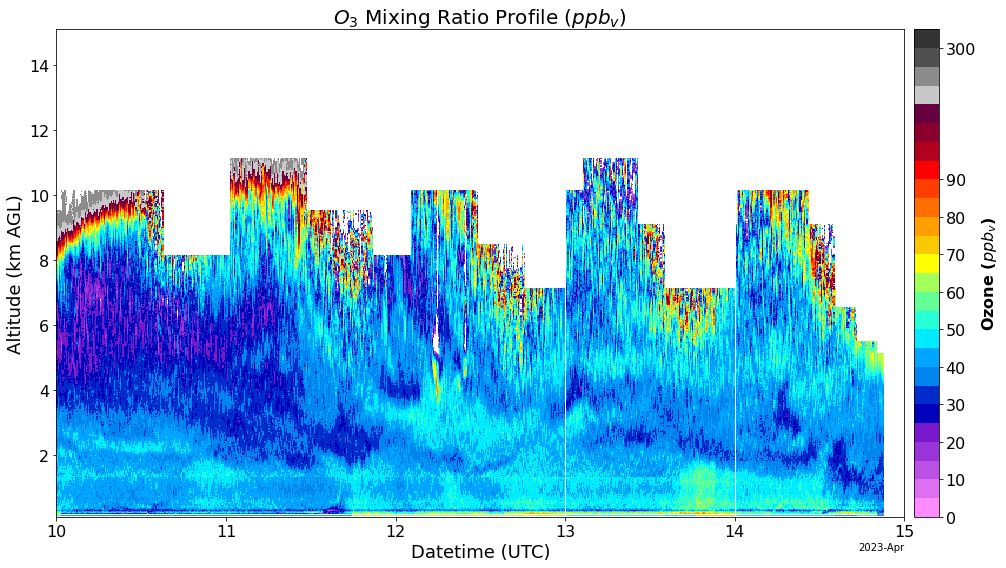

In [7]:
tolnet.import_data_json(min_date="2023-04-10", max_date="2023-04-15", product_type=[4], instrument_group=[2]).tolnet_curtains()